In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Tesla_stock_Price.csv")
df.head(5)

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


In [3]:
df.describe()

,Price,Open,High
count,3178.000000,3178.000000,3178.000000
mean,59.687725,59.743634,61.025938
std,95.588707,95.719847,97.820058
min,1.050000,1.080000,1.110000
25%,9.212500,9.272500,9.467500
50%,16.325000,16.350000,16.560000
75%,25.547500,25.402500,25.935000
max,409.970000,411.470000,414.500000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

<AxesSubplot:xlabel='Date', ylabel='Price'>

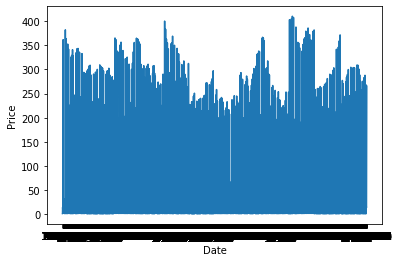

In [6]:
sns.lineplot(x=df['Date'],y=df['Price'])

In [7]:
df.dtypes

Date       object
Price     float64
Open      float64
High      float64
Low        object
Volume     object
Chg%       object
dtype: object

In [8]:
df.isnull().sum()

Date        0
Price      80
Open       80
High       80
Low        80
Volume     80
Chg%      120
dtype: int64

In [9]:
df['Price'].fillna(df['Price'].mean() ,inplace=True)

In [10]:
df['High'].fillna(df['High'].mean() ,inplace=True)
df['Open'].fillna(df['Open'].mean() ,inplace=True)

In [11]:
#df['Chg%'] = str(df['Chg%'])
#df['Chg%'] = df['Chg%'].str.split('%').str.get(0)
df['Chg%'] = df['Chg%'].str[:-1]
df['Chg%']=df['Chg%'].astype('float')
df['Chg%'].fillna(df['Chg%'].mean() ,inplace=True)
#df['Chg%']

In [12]:
df['Low']

0         1.77
1         2.78
2        13.91
3         12.4
4        15.55
         ...  
3253      13.3
3254     15.74
3255    140.16
3256    258.33
3257    262.47
Name: Low, Length: 3258, dtype: object

In [13]:
df['Volume'] = df['Volume'].str[:-1]
df['Volume']

0        42.98
1       211.59
2       110.57
3        56.92
4       239.96
         ...  
3253     38.79
3254     89.19
3255    144.44
3256     53.87
3257     67.73
Name: Volume, Length: 3258, dtype: object

In [14]:
df['Volume']=df['Volume'].astype('float')
df['Volume'].fillna(df['Volume'].mean(), inplace=True)

In [ ]:
pd.set_option('display.max_row', None)
df['Low']

In [ ]:
df.loc[df['Low'].str[-1:] == 'M', 'Low'] = df['Low'].str[:-1]
df['Low']

In [17]:
df['Low']=df['Low'].astype('float')

In [18]:
df['Low'].fillna(df['Low'].mean(), inplace=True)

In [19]:
df.describe()

,Price,Open,High,Low,Volume,Chg%
count,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000
mean,59.687725,59.743634,61.025938,59.047218,92.637684,0.222282
std,94.407460,94.536980,96.611237,92.205346,80.927284,3.553884
min,1.050000,1.080000,1.110000,1.000000,-6.360000,-21.060000
25%,9.702500,9.675000,9.842500,9.447500,41.787500,-1.440000
50%,16.560000,16.545000,16.790000,16.380000,76.590000,0.215000
75%,46.862500,46.645000,48.930000,50.870000,115.937500,1.887500
max,409.970000,411.470000,414.500000,405.670000,914.080000,24.460000


<AxesSubplot:xlabel='Date', ylabel='Chg%'>

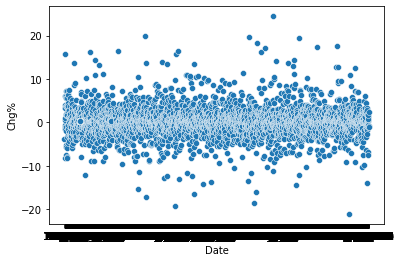

In [20]:
sns.scatterplot(x=df['Date'], y=df['Chg%'])

In [21]:
min_date = df[df['Price']==df['Price'].min()]['Date']
print(min_date)

1396    7-Jul-10
Name: Date, dtype: object


In [22]:
max_date = df[df['Price']==df['Price'].max()]['Date']
print(max_date)

2462    4-Nov-21
Name: Date, dtype: object


<AxesSubplot:xlabel='Open', ylabel='Price'>

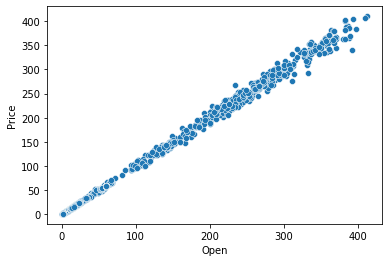

In [23]:
sns.scatterplot(x=df['Open'], y=df['Price'])

<AxesSubplot:xlabel='High', ylabel='Low'>

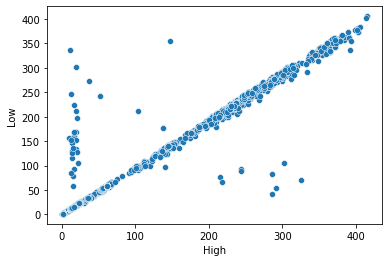

In [24]:
sns.scatterplot(x=df['High'], y=df['Low'])

In [31]:
df["10 days Rolling"] = df['Open'].rolling(10).mean()
df["30 days Rolling"] = df['Open'].rolling(30).mean()
df["60 days Rolling"] = df['Open'].rolling(60).mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

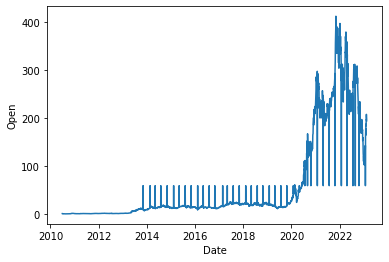

In [34]:
sns.lineplot(df['Date'], df['Open'])

In [33]:
df['Date']= pd.to_datetime(df['Date'], errors='coerce')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='10 days Rolling'>

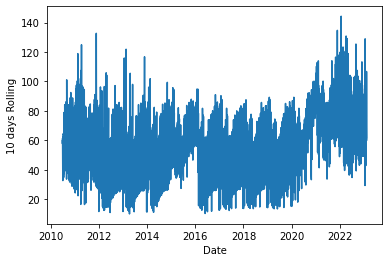

In [35]:
sns.lineplot(df['Date'], df['10 days Rolling'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='30 days Rolling'>

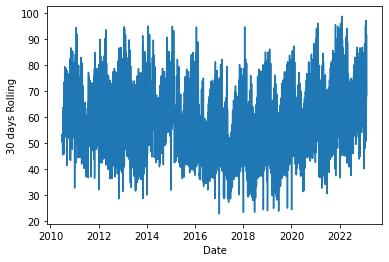

In [36]:
sns.lineplot(df['Date'], df['30 days Rolling'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='60 days Rolling'>

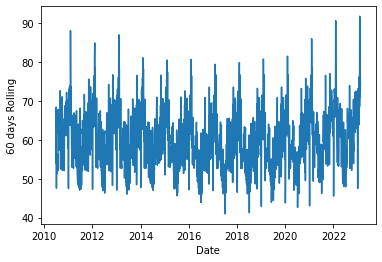

In [38]:
sns.lineplot(df['Date'], df['60 days Rolling'])